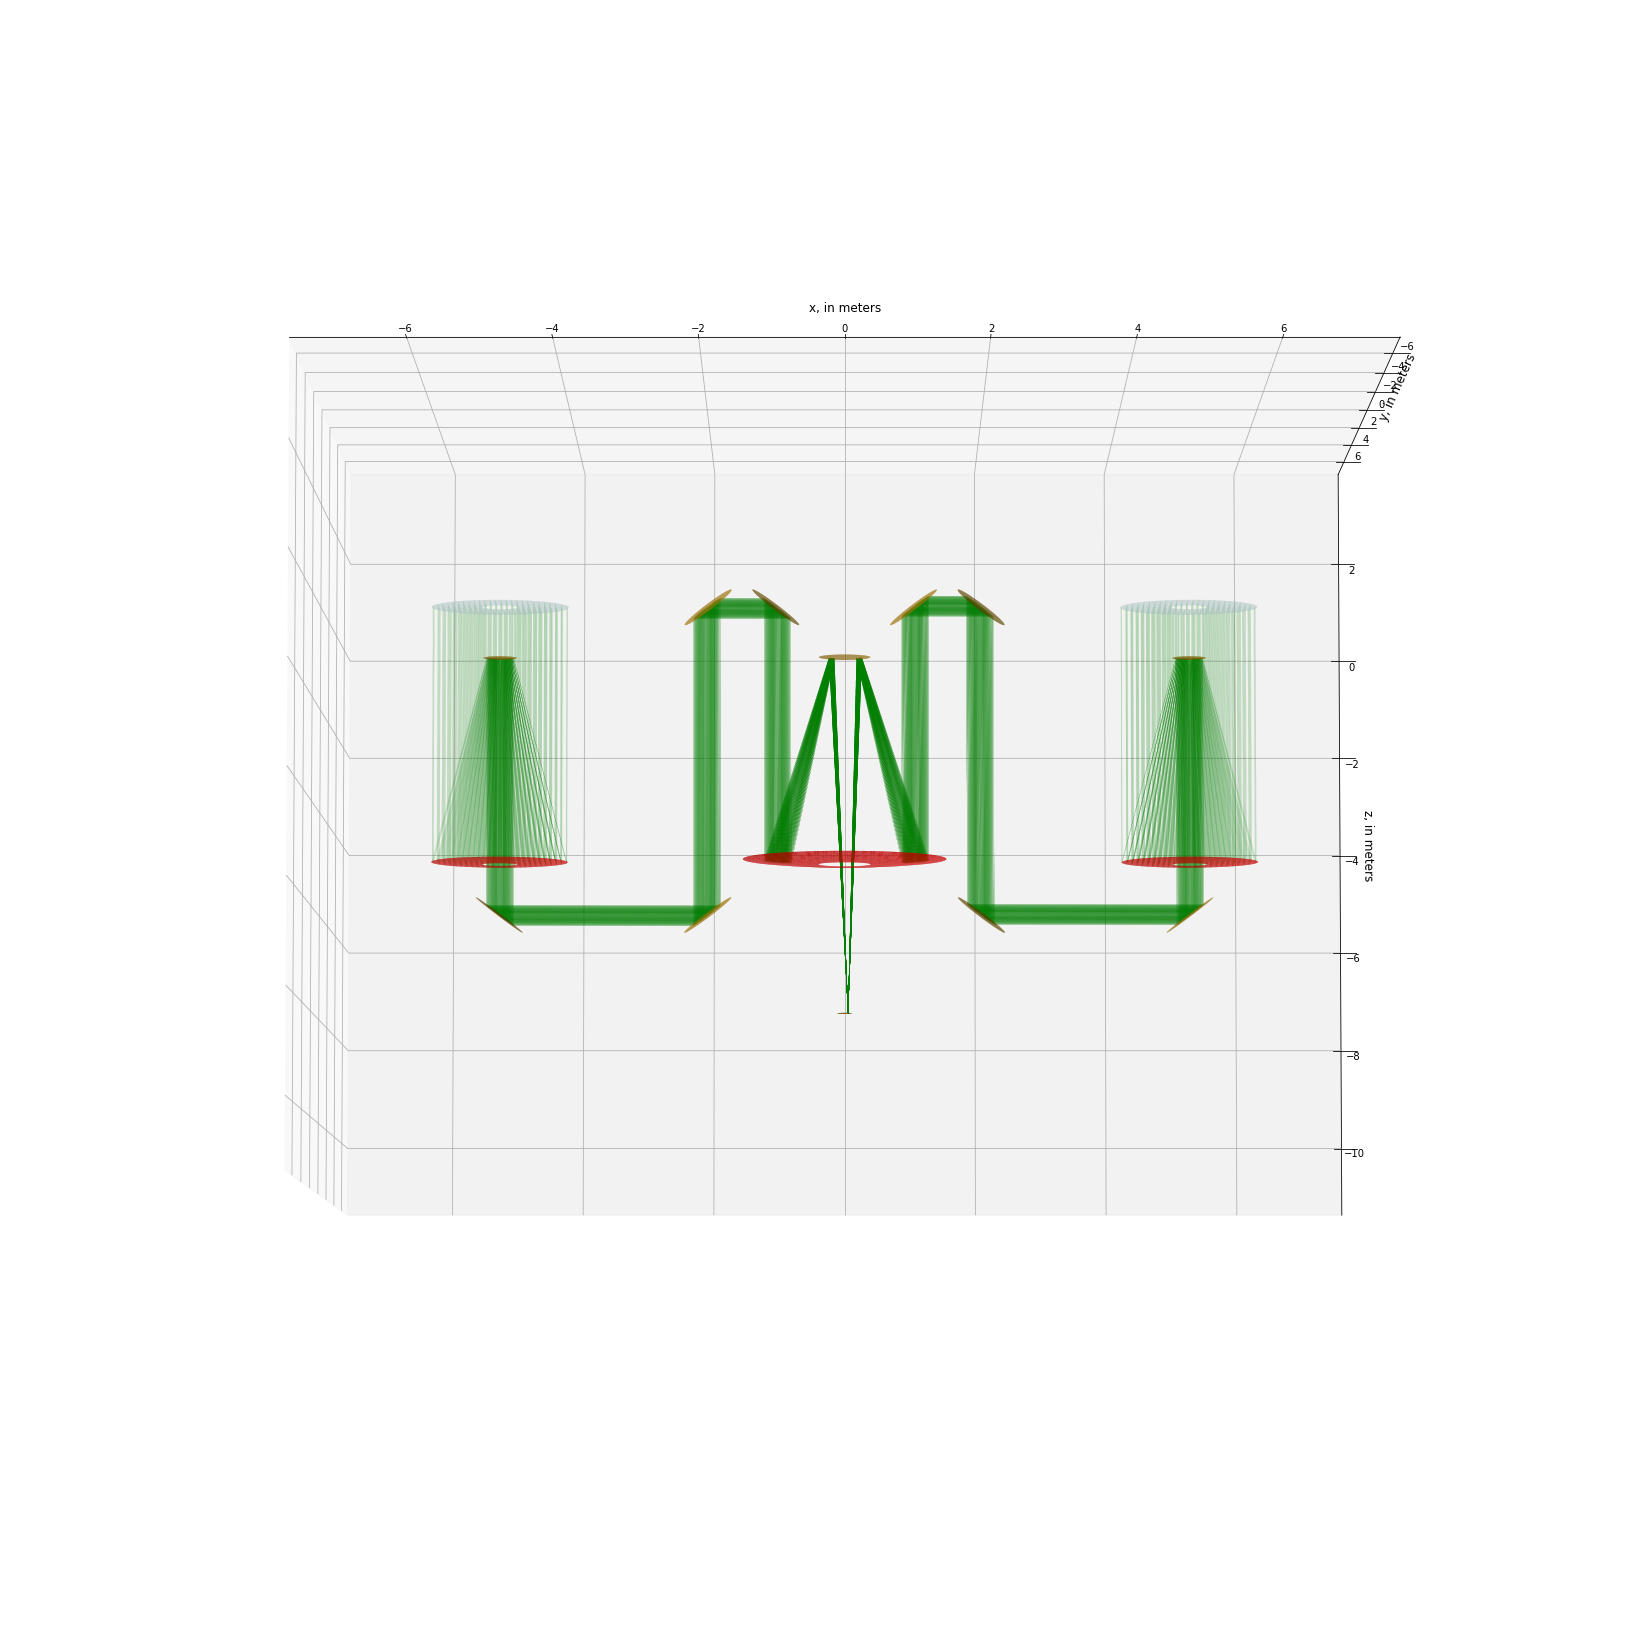

In [784]:
import pimms.optics as op
reload(op)
sim=op.SIM(init_b=10., detector_a=.15)
s=op.LightSource((np.pi,np.deg2rad(1./60.),np.inf))
p,q=s(sim.get_entrance(), 500, 1, sampling='dizzle')
trace,seq=sim.trace(q,steps=10)
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
trigs,zs,extent=sim.draw(axes=ax,draw_virtual=True,raytrace=trace,view_angles=(-5, -90))

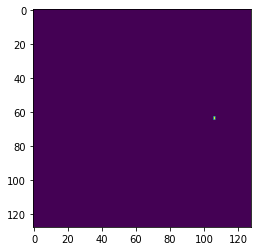

In [792]:
det=sim.get_detectors()[0]
det.photon_buffer=np.empty((0,),dtype=op.sptype)
for i in range(4):
    p,q=s(sim.get_entrance(), 10000, 1., sampling='dizzle')
    trace,seq=sim.trace(q,steps=10)
plt.imshow(det.readout(clear_buffer=False)[0])

In [800]:
np.deg2rad(5.)*10.

0.8726646259971648